Load sales dataset and prepare libraries for analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("D:/Sales analysis project/Sales_data.csv")

df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2019-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27,January,1,01/2019
1,SO - 0003378,2019-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46,January,1,01/2019
2,SO - 0005126,2019-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30,January,1,01/2019
3,SO - 0005614,2019-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56,January,1,01/2019
4,SO - 0005781,2019-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45,January,1,01/2019


Monthly sales revenue trends from 2019 to 2023

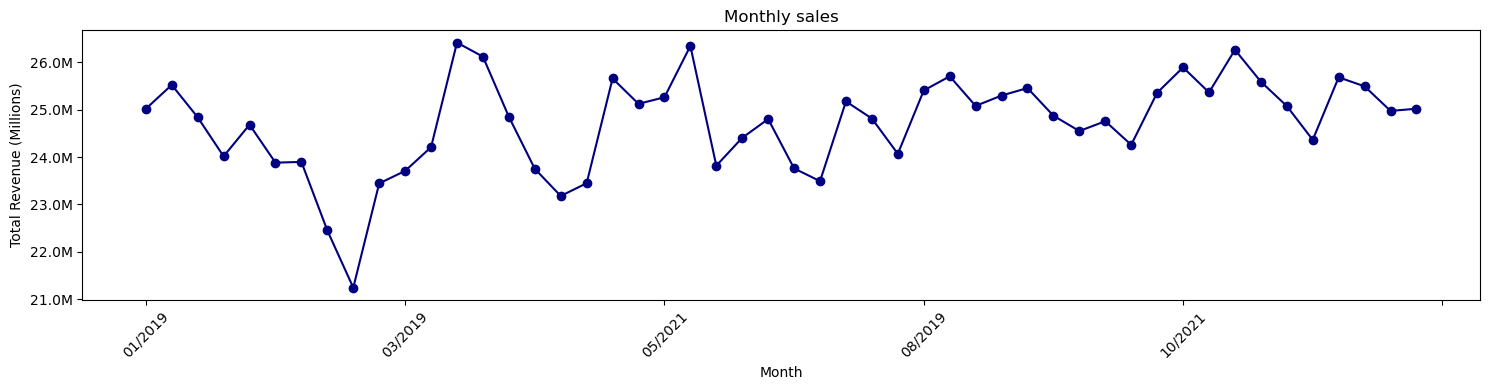

In [11]:
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize = (15,4))
monthly_sales.plot(marker='o', color='navy')
formater = FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M')
plt.gca().yaxis.set_major_formatter(formater)
plt.title('Monthly sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()


Monthly sales trends    

C:\Users\Volod\AppData\Local\Temp\ipykernel_30928\998820222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\Volod\AppData\Local\Temp\ipykernel_30928\998820222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month']=df_new['order_date'].dt.strftime('%B')


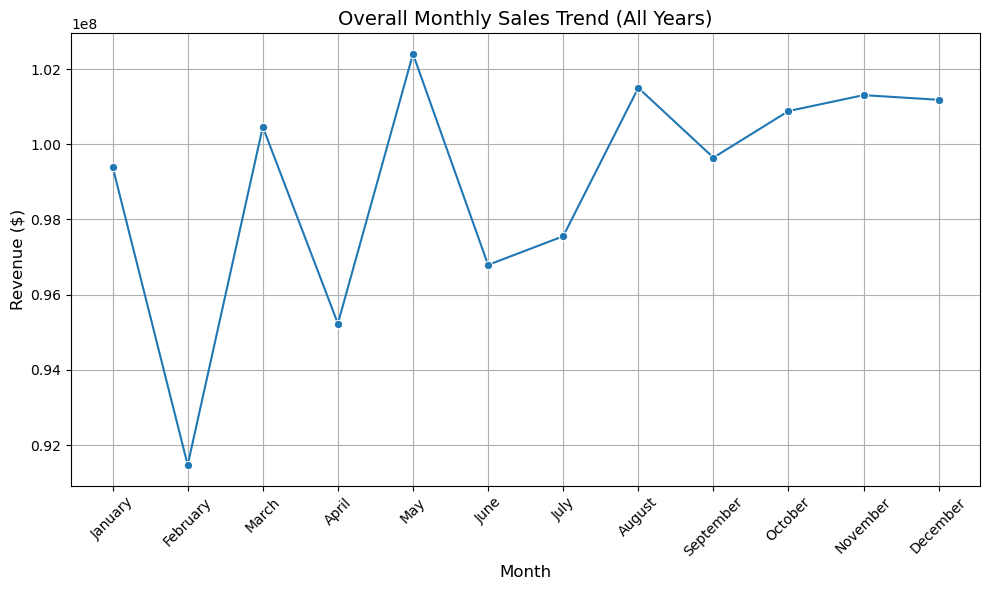

In [12]:
monthly_sales = df.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().sort_index()
df['order_date'] = pd.to_datetime(df['order_date'])
df_new = df[(df['order_date'].dt.year >= 2019) & (df['order_date'].dt.year <= 2022)]
df_new['order_date'] = pd.to_datetime(df_new['order_date'])
df_new['month']=df_new['order_date'].dt.strftime('%B')
monthly_trend = df_new.groupby('month') ['revenue'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True) 
monthly_trend.sort_values('month')
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o') 
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14) 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 products by revenue

C:\Users\Volod\AppData\Local\Temp\ipykernel_30928\4073259182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y = 'revenue', palette = 'tab10')


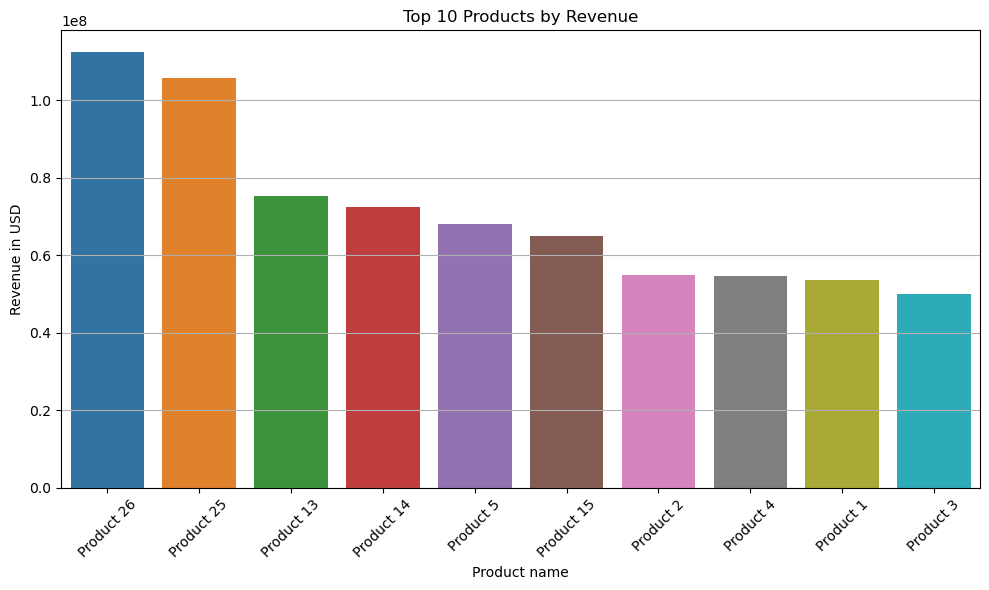

In [44]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
top_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='product_name', y = 'revenue', palette = 'tab10')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product name')
plt.ylabel('Revenue in USD')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

10 lowest-revenue products

C:\Users\Volod\AppData\Local\Temp\ipykernel_30928\45117837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y = 'revenue', palette = 'tab10')


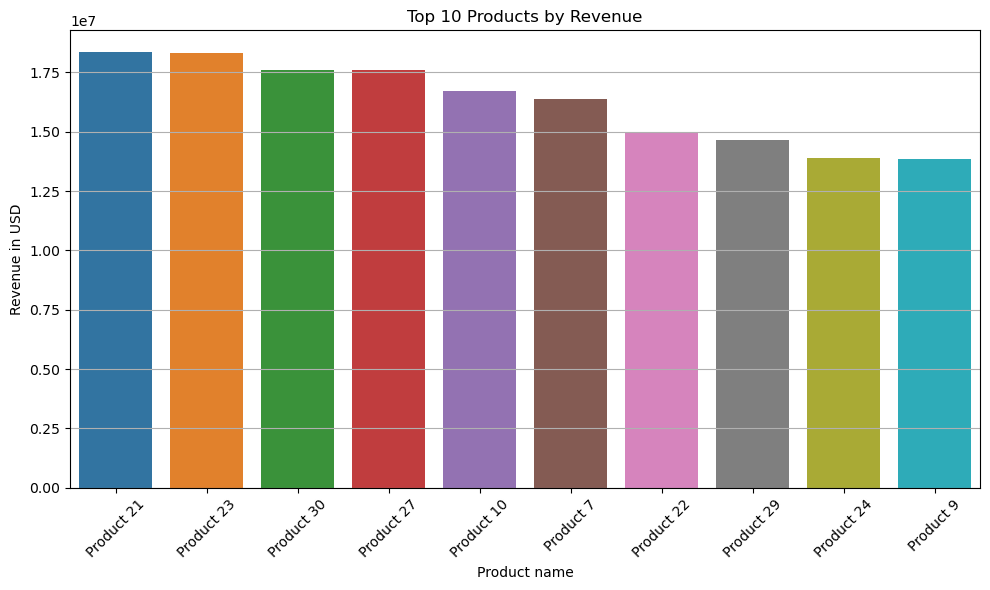

In [43]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
top_products = product_revenue.sort_values(by='revenue', ascending=False).tail(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='product_name', y = 'revenue', palette = 'tab10')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product name')
plt.ylabel('Revenue in USD')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Distribution of average order values

Text(0, 0.5, 'Number of Orders')

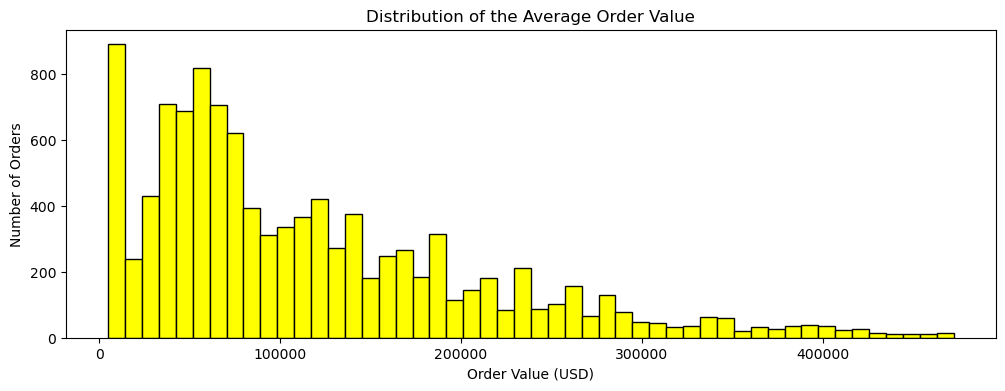

In [15]:
average_order_dist = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(average_order_dist,
         bins=50,
         color = 'yellow',
         edgecolor = 'black')
plt.title('Distribution of the Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')


Total sales distribution by channel

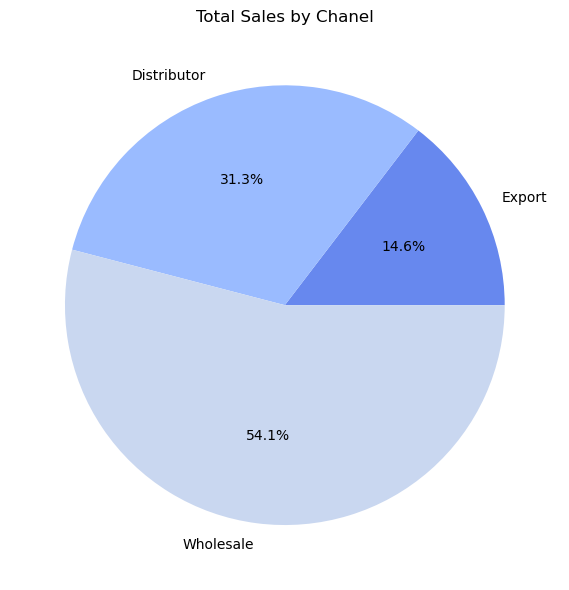

In [16]:
chan_sale = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(12,6))
plt.pie(
    chan_sale.values,
    labels=chan_sale.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Chanel')
plt.tight_layout()
plt.show()